#**Sequential Data: 순차 데이터**

지금까지는 데이터의 각 샘플이 독립적이라고 가정해왔다.   

    예를 들어 패션 MNIST에서 m 번째 샘플(셔츠)이 m+1 번째 샘플(스니커즈)과 상관이 없는 것처럼

하지만 데이터 중에는 서로 연관되어 있는 샘플이 있는 경우가 많다.   

    예를 들어 오후 1시의 기온을 알고 있다면, 1시간 뒤의 기온 또한 비슷하다고 예상할 수 있는 것처럼

이렇게 일정 시간 간격으로 배치된 데이터를 **'시계열 데이터(time series)'**라고 한다.

시계열 데이터를 포함하여 샘플에 순서가 있는 데이터를 **'순차 데이터(sequential data)'**라고 부른다.   
대표적인 순차 데이터로는 텍스트가 있다.   
이때 모델에서 순차 데이터를 처리하는 각 단계를 **'타입 스텝(time step)'**이라고 한다.

>Hello Deep Learing

만약 이 데이터를 단어 단위로 처리한다면 타임스텝은 3이 된다.   
만약 글자 단위로 처리한다면 타임스텝은 19가 될 것이다.   

이러한 순차 데이터를 처리하기 위해서는 **'순환 신경망(Recurrent Neural Networ)'**을 이용해야 한다.

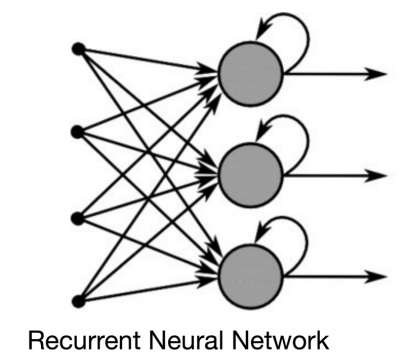

#**Recurrent Neural Network: 순환 신경망**

위는 순환 신경망의 구조이다.   
자세히 보면 지금까지 배운 인공신경망과 다른 차이점을 볼 수가 있는데,   
바로 은닉층의 출력이 다시 은닉층의 입력으로 들어가 순환하는 것이다.

순환 구조를 가지는 신경망의 특징은 **'이전 샘플의 정보를 현재 샘플을 처리할 때 참조'**할 수 있어   
앞의 샘플을 고려하여 현재 샘플을 처리할 수 있다는 점이다.  

###**Cell: 셀**

순환 신경망에서는 층이나 뉴런을 **'셀(cell)'**이라고 한다.   
순환 신경망에서는 셀의 출력을 **'은닉 상태(hidden state)'**라고 부른다.   

현재의 은닉 상태 $𝘩$를 계산하기 위해 이전 타임스텝의 은닉 상태 $𝘩_p$를 사용한다.(현재의 은닉 상태는 다음 입력을 처리할 때 다시 사용한다.)   

순환층에서 일어나는 계산은 다음과 같다.   
###$$\begin{align}
  𝐻 &= tanh(𝑍) \\
  𝑍 &= 𝑋𝑊_x + 𝐻_p𝑊_h + 𝑏
  \end{align}
$$
<br>

앞서 공부한 정방향 계산식($𝑍 = 𝑋𝑊 + 𝑏$)와 유사하지만   
이전 타임스텝의 은닉상태 $𝐻_p$와 곱하는 가중치 $𝑊_h$가 있다는 점이 다르다.   
순환 신경망에서는 활성화 함수로 하이퍼볼릭 탄젠트(tanh) 함수를 많이 사용하므로,   
은닉상태 $𝐻$를 계산하는 함수를 tanh로 표기했다.




#**순환 신경망의 정방향 계산**

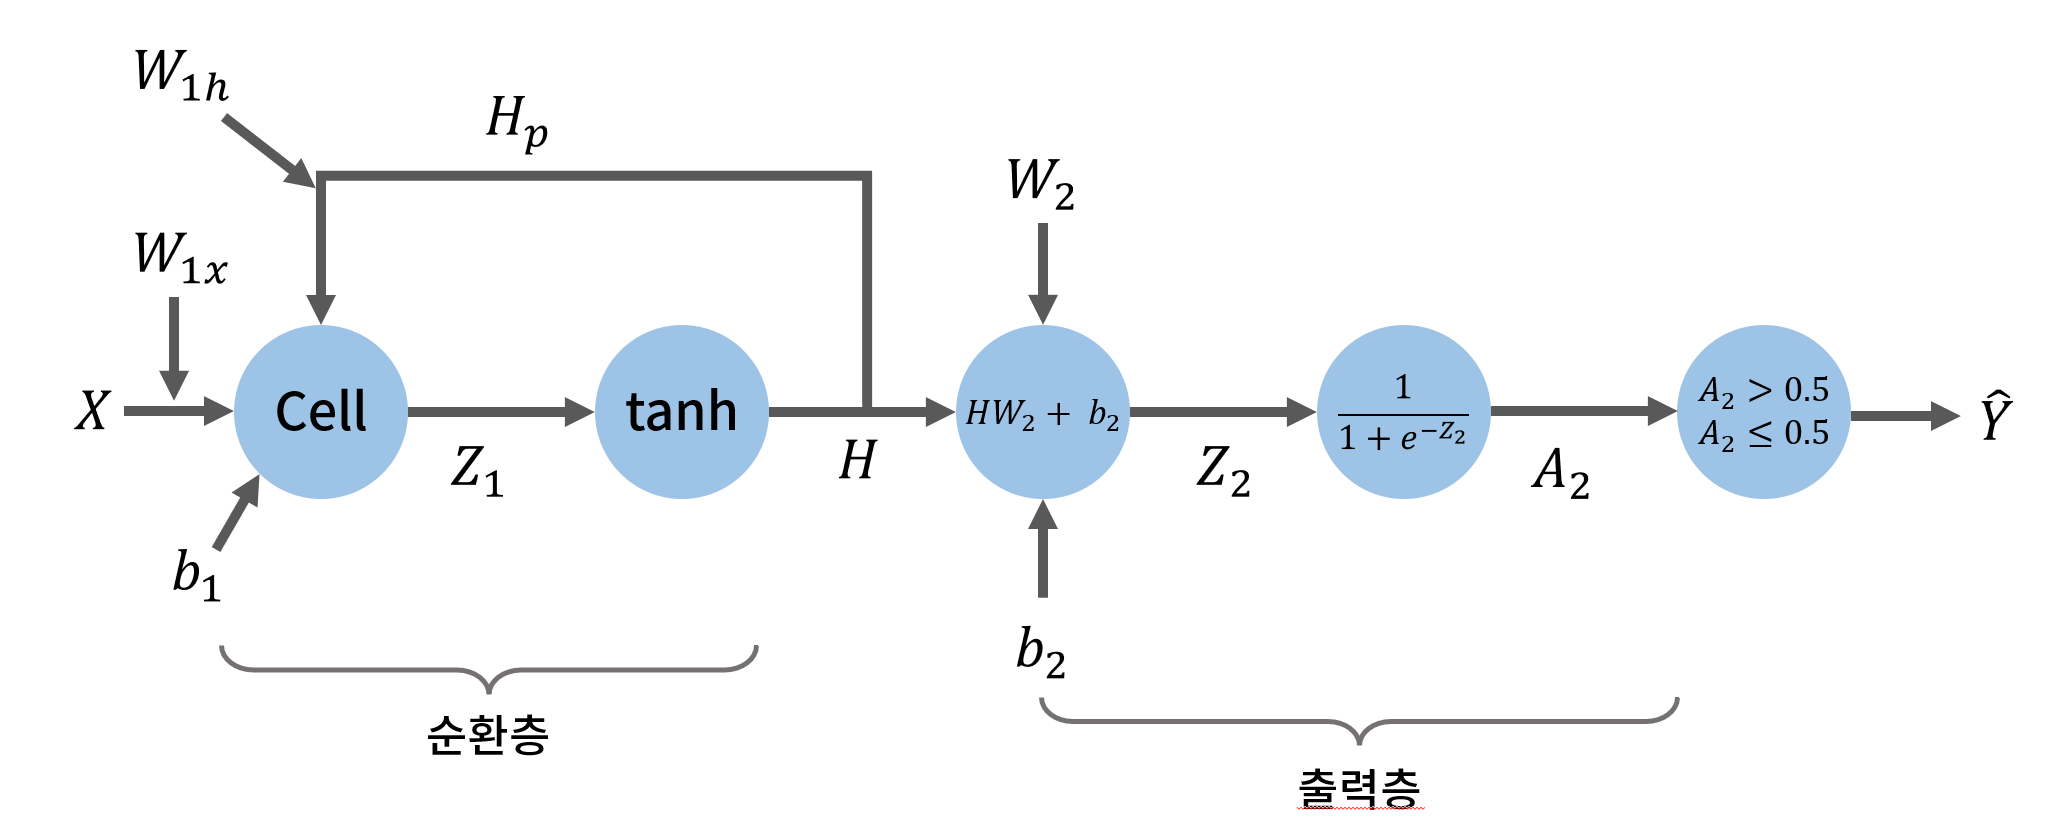

위 신경망은 이진 분류 문제를 가정했기 때문에 출력층의 활성화 함수를 시그모이드 함수로 지정했다.   

|순환층의 정방향 계산|출력층의 정방향 계산|
|:--------------------------------:|:-----------------:|
|$$𝑍_1 = 𝑋𝑊_{1x} + 𝐻_p𝑊_{1h} + 𝑏_1$$|$$𝑍_2 = 𝐻𝑊_2 + 𝑏_2$$|
|$$𝐻 = tanh(𝑍)$$|$$𝐴_2 = sigmoid(𝑍_2)$$|


이제 정방향 계산에 필요한 입력과 가중치의 구조를 알아보자.   

###**은닉층**

> 입력 데이터 $𝑋$의 크기는 ($m,\, n_f$)이고, $m$은 샘플 개수, $n_f$는 특성 개수이다.   

> 입력에 곱해지는 가중치 $𝑊_{1x}$의 크기는 ($n_f,\, n_c$)이다. ($n_c$는 순환층의 셀 개수)

따라서

###$$
  𝑋𝑊_{1x} = (m,\, n_f)⋅(n_f,\, n_c) = (m,\, n_c)
$$

이므로 $𝑍_1$과 $𝐻$, 이전 은닉상태 $𝐻_p$ 모두 ($m,\, n_c$)이어야 한다는 것을 알 수 있다.   

또한 $𝐻_p𝑊_{1h}$의 크기도 ($m,\, n_c$)여야 하므로   
이전 은닉상태와 곱해지는 가중치 $𝑊_{1h}$는 ($n_c,\, n_c$)가 되어야 한다.   

###$$
  𝐻_p𝑊_{1h} = (m,\, n_c)⋅(n_c,\, n_c) = (m,\, n_c)
$$
<br>

###**출력층**

출력층으로 전달되는 은닉상태 $𝐻$의 크기가 ($m,\, n_c$)이므로,   
이와 곱해지는 가중치 $𝑊_2$의 크기는 ($n_c$, n_classes)이다.   
따라서 $𝑍_2$와 $𝐴_2$의 크기는 ($m$, n_classes)이다.   
지금은 이진 분류를 가정하고 있으므로 n_classes는 1이 될 것이다.   

###$$
  𝐻𝑊_2 = (m,\, n_c)⋅(n_c,\, 1) = (m,\, 1)
$$

각 층의 뉴런마다 절편이 하나씩 필요하므로  
$𝑏_1$의 크기는 ($n_c$,)이고, $𝑏_2$의 크기는 (n_classes,)이다.
